# Bùi Hoàng Linh
# Thực hành

In [10]:
# cài đặt các thư viện cần thiết
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # loại bỏ các cảnh báo
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB

In [3]:
# Khai báo các giá trị tham số
path_file    = 'PC2.csv'
random_state = 42   # dùng trong chia dữ liệu
test_size    = 0.25 # dùng trong chia dữ liệu
k_fold       = 10   # dùng trong đánh giá kiểm định chéo
CV           = 5    # dùng trong quá trình tìm kiếm tham số tốt nhất
DPI          = 500  # độ phân giải cho biểu đồ

In [5]:
# đọc dữ liệu sử dụng pandas
try:
    # đọc file csv
    df = pd.read_csv(path_file, header = 0,
                     sep = ',',
                     skipinitialspace = True)
    print('Đọc file thành công !')
    print(df.head(5))
except FileNotFoundError:
    print(f"Lỗi : File '{path_file}' không tồn tại")

Đọc file thành công !
   0  1   2   3  4  5     6  7    8  9  ...  27    28  29  30  31  32  33  \
0  1  0   0   0  0  1  1.00  0  0.0  1  ...   2  0.50   1   3   1   3   2   
1  1  1   0   0  0  1  1.00  0  0.0  1  ...   3  1.00   1   0   1   0   1   
2  1  4   7  24  0  1  0.13  0  0.0  1  ...   7  0.03  13  21   7   8  34   
3  1  1  11   3  0  1  0.08  0  0.0  1  ...   3  0.06  29  48  13   7  17   
4  1  1   0   0  0  1  1.00  0  0.0  1  ...   3  0.33   5   4   4   1   3   

      34  35     36  
0   0.00   0  False  
1   0.00   0  False  
2  96.88   8  False  
3  93.33  12  False  
4   0.00   1  False  

[5 rows x 37 columns]


In [7]:
# kiểm tra thông tin dữ liệu
# kiểm tra dữ liệu có thiếu hay không
check_nan = df.isna().any().any()
if check_nan:
    print('Dữ liệu bị thiếu !')
else:
    print('Dữ liệu đầy đủ')

Dữ liệu đầy đủ


In [24]:
# tiền xử lý dữ liệu


# Chuyển đổi các thuộc tính dạng ký tự sang số
Le = LabelEncoder()
df['36'] = Le.fit_transform(df['36'])

# chuẩn hoá dữ liệu min-max
# lấy dữ liệu chuẩn hoá từ dataframe
df_X = df.iloc[:,:-1]
df_y = df.iloc[:, -1]

# Chuẩn hoá dữ liệu
scaler = MinMaxScaler()
df_X = scaler.fit_transform(df_X)
print(df)

      0  1   2   3  4  5     6  7    8  9  ...  27    28  29  30  31  32  33  \
0     1  0   0   0  0  1  1.00  0  0.0  1  ...   2  0.50   1   3   1   3   2   
1     1  1   0   0  0  1  1.00  0  0.0  1  ...   3  1.00   1   0   1   0   1   
2     1  4   7  24  0  1  0.13  0  0.0  1  ...   7  0.03  13  21   7   8  34   
3     1  1  11   3  0  1  0.08  0  0.0  1  ...   3  0.06  29  48  13   7  17   
4     1  1   0   0  0  1  1.00  0  0.0  1  ...   3  0.33   5   4   4   1   3   
...  .. ..  ..  .. .. ..   ... ..  ... ..  ...  ..   ...  ..  ..  ..  ..  ..   
5584  1  5   6  41  0  1  0.14  0  0.0  1  ...   9  0.02  15  23  11   5  50   
5585  3  2   2   0  4  2  0.67  2  2.0  2  ...   8  0.40   8  11   3   8   5   
5586  1  0   1   2  0  1  0.50  0  0.0  1  ...   2  0.17   1   5   1   5   6   
5587  1  1   1   0  0  1  0.50  0  0.0  1  ...   3  0.17   3   5   3   5   6   
5588  3  2   2   0  4  2  0.67  2  2.0  2  ...   6  0.40   4   7   4   6   5   

         34  35  36  
0      0.00   0  

In [25]:
# Chuẩn bị dữ liệu huấn luyện

# đánh giá theo phương pháp chia tỷ lệ
X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,
                                                 test_size = test_size,
                                                 random_state= random_state)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4191, 36), (1398, 36), (4191,), (1398,))

In [27]:
# Khởi tạo và huấn luyện mô hình

# Khởi tạo mô hình bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test,y_pred_gnb))
report = classification_report(y_test,y_pred_gnb, output_dict = True)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1392
           1       0.05      0.50      0.10         6

    accuracy                           0.96      1398
   macro avg       0.53      0.73      0.54      1398
weighted avg       0.99      0.96      0.98      1398



In [59]:
# sử dụng GridSearchSV để tìm kiếm một bộ tham số cho mô hình SVM
# Khởi tạo Lưới tham số
parameters = {
    'kernel': ['linear','rbf','poly','sigmoid'],   # các dạng hàm kernel
    'C'     : [0.001, 0.1, 1, 10],                 # Tham số phạt của mô hình
    'coef0' : [2, 3, 4,5],                      # Tham số gamma của đa thức
    'degree': [2, 3, 4,5]                       # Bậc của đa thức
}

clf1 = SVC()
clf1.fit(X_train, y_train) # Huấn luyện mô hình

# tìm kiếm tham số
gridsearch1 = GridSearchCV( estimator= clf1,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = CV,
                          verbose = 2,
                          refit = True)
gridsearch1.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END ..........C=0.001, coef0=2, degree=2, kernel=linear; total time=   0.0s
[CV] END ..........C=0.001, coef0=2, degree=2, kernel=linear; total time=   0.0s
[CV] END ..........C=0.001, coef0=2, degree=2, kernel=linear; total time=   0.0s
[CV] END ..........C=0.001, coef0=2, degree=2, kernel=linear; total time=   0.0s
[CV] END ..........C=0.001, coef0=2, degree=2, kernel=linear; total time=   0.0s
[CV] END .............C=0.001, coef0=2, degree=2, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, coef0=2, degree=2, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, coef0=2, degree=2, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, coef0=2, degree=2, kernel=rbf; total time=   0.0s
[CV] END .............C=0.001, coef0=2, degree=2, kernel=rbf; total time=   0.0s
[CV] END ............C=0.001, coef0=2, degree=2, kernel=poly; total time=   0.0s
[CV] END ............C=0.001, coef0=2, degree

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10], 'coef0': [2, 3, 4, 5],
                         'degree': [2, 3, 4, 5],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [60]:
# đưa ra tham số tốt nhất và độ chính xác cao nhất khi GridSearchSV
# in ra bộ tham số tốt nhất
best_params1 = gridsearch1.best_params_
print(f'Bộ tham số tốt nhất của mô hình: {best_params1}')
# in ra bộ chính xác cao nhất của mô hình
print(f'Độ chính xác cao nhất của mô hình: {gridsearch1.best_score_}')

Bộ tham số tốt nhất của mô hình: {'C': 0.001, 'coef0': 2, 'degree': 2, 'kernel': 'linear'}
Độ chính xác cao nhất của mô hình: 0.9958260368276933


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       0.00      0.00      0.00         2

    accuracy                           1.00       558
   macro avg       0.50      0.50      0.50       558
weighted avg       0.99      1.00      0.99       558



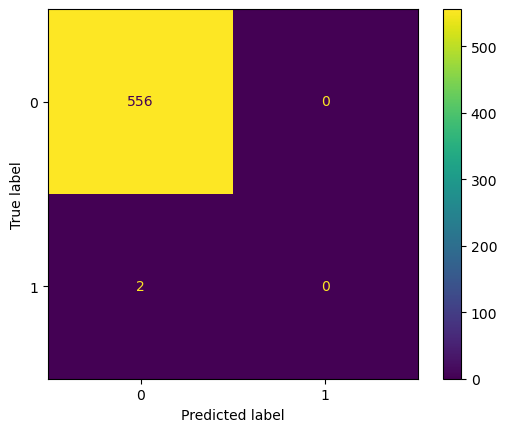

In [61]:
clf1 = SVC(**best_params1)
clf1.fit(X_train, y_train)

# đánh giá mô hình
y_pred1 =  clf1.predict(X_test)
# đưa ra báo cáo đánh giá
print(classification_report(y_test,y_pred1))
report = classification_report(y_test,y_pred1, output_dict = True)
ConfusionMatrixDisplay.from_estimator(clf1,X_test,y_test)

In [64]:
# sử dụng GridSearchSV để tìm kiếm một bộ tham số cho mô hình Knn
# Khởi tạo Lưới tham số
parameters = {
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}
clf2 = neighbors.KNeighborsClassifier()
# tìm kiếm tham số
gridsearch2 = GridSearchCV(estimator= clf2,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = CV,
                          verbose = 2,
                          refit = True)
gridsearch2.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=2, we

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [65]:
# đưa ra tham số tốt nhất và độ chính xác cao nhất khi GridSearchSV
# in ra bộ tham số tốt nhất
best_params2 = gridsearch2.best_params_
print(f'Bộ tham số tốt nhất của mô hình: {best_params2}')
# in ra bộ chính xác cao nhất của mô hình
print(f'Độ chính xác cao nhất của mô hình: {gridsearch2.best_score_}')

Bộ tham số tốt nhất của mô hình: {'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'uniform'}
Độ chính xác cao nhất của mô hình: 0.9958260368276933


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       0.00      0.00      0.00         2

    accuracy                           1.00       558
   macro avg       0.50      0.50      0.50       558
weighted avg       0.99      1.00      0.99       558



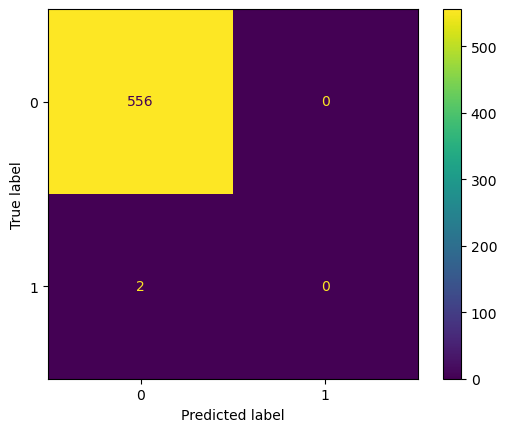

In [66]:
clf2 = neighbors.KNeighborsClassifier(**best_params2)
clf2.fit(X_train, y_train)

# đánh giá mô hình
y_pred2 =  clf2.predict(X_test)
# đưa ra báo cáo đánh giá
print(classification_report(y_test,y_pred2))
report = classification_report(y_test,y_pred2, output_dict = True)
ConfusionMatrixDisplay.from_estimator(clf2,X_test,y_test)

In [79]:
# đánh giá mô hình theo phương pháp kiểm định chéo cho mô hình KNN
# khởi tạo hàm kiểm định chéo
kf = KFold(n_splits = k_fold , shuffle = True, random_state = random_state)

accuracies1 = []
precisions1 = []
recalls1    = []
f1_scores1  = []

accuracies2 = []
precisions2 = []
recalls2    = []
f1_scores2  = []

i = 1
for train_index, test_index in  kf.split(df_X):
    start = time.time()
    # Chia dữ liệu thành training và testing
    X_train, X_test = df_X[train_index],df_X[test_index]
    y_train, y_test = df_y[train_index],df_y[test_index]

    print( X_train.shape)
    print( X_test.shape)
    print( y_train.shape)
    print( y_test.shape)
    #Khởi tạo mô hình
    clf1 = SVC(**best_params1)
    clf2 = neighbors.KNeighborsClassifier(**best_params2)

    #huấn luyện mô hình 
    clf1.fit(X_train,y_train)
    clf2.fit(X_train,y_train)
    finish = time.time() - start
    print(f'Thời gian huấn luyện {finish:<5.4} (giây)')
    # dự đoán mô hình
    y_pred1 = clf1.predict(X_test)
    y_pred2 = clf2.predict(X_test)
    # đưa ra độ chính xác mô hình SVM
    accuracy1 = accuracy_score(y_test,y_pred1)
    precision1 = precision_score(y_test,y_pred1)
    recall1 = recall_score(y_test,y_pred1)
    f1score1 = f1_score(y_test,y_pred1)
    
    # đưa ra độ chính xác mô hình KNN
    accuracy2 = accuracy_score(y_test,y_pred2)
    precision2 = precision_score(y_test,y_pred2)
    recall2 = recall_score(y_test,y_pred2)
    f1score2 = f1_score(y_test,y_pred2)

    #in ra kết quả
    
    print('Fold: ', i)
    print("{:<15} | {:<15} | {:<15}".format("Metric", "SVM", "KNN"))
    print("-" * 50)  # Dòng phân cách
    print("{:<15} | {:<5.4}% | {:<4.4}%".format("Accuracy", accuracy1*100, accuracy2*100))
    print("{:<15} | {:<5.4}% | {:<4.4}%".format("Precision", precision1*100, precision2*100))
    print("{:<15} | {:<5.4}% | {:<4.4}%".format("Recall", recall1*100, recall2*100))
    print("{:<15} | {:<5.4}% | {:<4.4}%".format("F1 - score", f1score1*100, f1score2*100))
    print("##################################################")
    # append vào các mảng
    accuracies1.append(accuracy1)
    precisions1.append(precision1)
    recalls1.append(recall1)
    f1_scores1.append(f1score1)
    
    accuracies2.append(accuracy2)
    precisions2.append(precision2)
    recalls2.append(recall2)
    f1_scores2.append(f1score2)
    i = i+1

(5030, 36)
(559, 36)
(5030,)
(559,)
Thời gian huấn luyện 0.009193 (giây)
Fold:  1
Metric          | SVM             | KNN            
--------------------------------------------------
Accuracy        | 99.46% | 99.46%
Precision       | 0.0  % | 0.0 %
Recall          | 0.0  % | 0.0 %
F1 - score      | 0.0  % | 0.0 %
##################################################
(5030, 36)
(559, 36)
(5030,)
(559,)
Thời gian huấn luyện 0.001061 (giây)
Fold:  2
Metric          | SVM             | KNN            
--------------------------------------------------
Accuracy        | 99.82% | 99.64%
Precision       | 0.0  % | 0.0 %
Recall          | 0.0  % | 0.0 %
F1 - score      | 0.0  % | 0.0 %
##################################################
(5030, 36)
(559, 36)
(5030,)
(559,)
Thời gian huấn luyện 0.00979 (giây)
Fold:  3
Metric          | SVM             | KNN            
--------------------------------------------------
Accuracy        | 99.64% | 99.64%
Precision       | 0.0  % | 0.0 %
Recall     

In [76]:
# Tính các giá trị trung bình
mean_accuracy1  = np.mean(accuracies1)
std_acc1        = np.std(accuracies1)

mean_precision1 = np.mean(precisions1)
std_pre1        = np.std(precisions1)

mean_recall1    = np.mean(recalls1)
std_rec1        = np.std(recalls1)

mean_f1_score1  = np.mean(f1_scores1)
std_f11         = np.std(f1_scores1)

# in ra các giá trị trung bình
print('các giá trị trung bình của SVM')
print("{:<15}:  {:>5.4} {:<1} {:>5.4}".format("Mean accuracy",mean_accuracy1,"±",std_acc1))
print("{:<15}:  {:>5.4} {:<1} {:>5.4}".format("Mean precision",mean_precision1,"±",std_pre1))
print("{:<15}:  {:>5.4} {:<1} {:>5.4}".format("Mean recall",mean_recall1,"±",std_rec1))
print("{:<15}:  {:>5.4} {:<1} {:>5.4}".format("Mean f1-score",mean_f1_score1,"±",std_f11))

# Tính các giá trị trung bình
mean_accuracy2  = np.mean(accuracies2)
std_acc2        = np.std(accuracies2)

mean_precision2 = np.mean(precisions2)
std_pre2        = np.std(precisions2)

mean_recall2    = np.mean(recalls2)
std_rec2        = np.std(recalls2)

mean_f1_score2  = np.mean(f1_scores2)
std_f12         = np.std(f1_scores2)

# in ra các giá trị trung bình
print('các giá trị trung bình của KNN')
print("{:<15}:  {:>5.4} {:<1} {:>5.4}".format("Mean accuracy",mean_accuracy1,"±",std_acc2))
print("{:<15}:  {:>5.4} {:<1} {:>5.4}".format("Mean precision",mean_precision1,"±",std_pre2))
print("{:<15}:  {:>5.4} {:<1} {:>5.4}".format("Mean recall",mean_recall1,"±",std_rec2))
print("{:<15}:  {:>5.4} {:<1} {:>5.4}".format("Mean f1-score",mean_f1_score1,"±",std_f12))

các giá trị trung bình của SVM
Mean accuracy  :  0.9959 ± 0.001968
Mean precision :    0.0 ±   0.0
Mean recall    :    0.0 ±   0.0
Mean f1-score  :    0.0 ±   0.0
các giá trị trung bình của KNN
Mean accuracy  :  0.9959 ± 0.001649
Mean precision :    0.0 ±   0.0
Mean recall    :    0.0 ±   0.0
Mean f1-score  :    0.0 ±   0.0
